<a href="https://colab.research.google.com/github/Neha120903/DeepLearning_Pytorch/blob/main/Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Mar 27 10:11:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

###Checking for GPU access for pytorch

In [ ]:

import torch
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# count number of devices
torch.cuda.device_count()

1

## Putting tensors (and models) on GPU
The reason we want our tensors/models on the GPU is because using a GPU results in faster computations

In [ ]:
# Create  a tensor (default on CPU)
tensor=torch.tensor([1,2,3])
# tensor not on GPU
print(tensor,tensor.device)


tensor([1, 2, 3]) cpu


In [ ]:
#  Move tensor to GPU
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### Moving tensor back to CPU

In [ ]:
# If tensor is on GPU can't transform it to numpy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# To fix the gpu tensor with numpy issue, we can first set it to CPU
tensor_back_on_cpu= tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

##Pytorch Workflow

Let's explore pytorch workflow

---



In [ ]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fit model or training",
                        4: "making predictions and evaluating a model (infernece)",
                        5: "save and load a model",
                        6: "putting it all together"}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fit model or training',
 4: 'making predictions and evaluating a model (infernece)',
 5: 'save and load a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks(graph)
import matplotlib.pyplot as plt
# check pytorch version
torch.__version__

'2.6.0+cu124'

## Data Preparing and Loading


To showcase, let's create some known data using the linear regression formula.
we'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create *known* parameters
import torch
weight= 0.7
bias=0.3

# create
start=0
end=1
step= 0.02
# in this capital
X = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X+ bias

X[:10],y[:10] ,len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

##Splitting data into training andd test sets (one of the most important cases in machine learning

In [ ]:
# create a train test split
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
X_train , y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?
this is where the data sxplorer comes in

In [ ]:
def plot_predictions(train_data =X_train, train_labels=y_train,test_data=X_test, test_labels=y_test,predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  # plot test data in green
  plt.scatter(test_data,test_labels, c="g", s=4,label= "Testing Data")
  # are there predictions
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r",s=4, label="Predictions")
  # show legend
  plt.legend(prop={"size" :14})

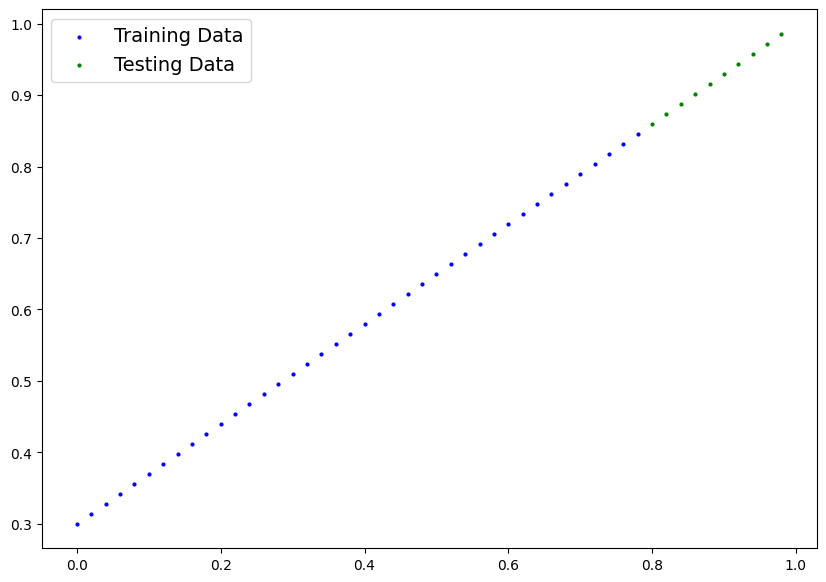

In [ ]:
plot_predictions()

##2. Building a model

We are going to building classses throughout the course, learn OOP in python

What our model does:
* start with random values(wt and bias)
* Look at training data and adjust random values to better represent the ideal values( the wt and bais values used to create data)

How does it do so?

1.Gradient descent

2.Backpropagation

In [ ]:
from torch import nn
# create a linear regression model class
class LinearRegressionModel(nn.Module): #<- almost eveything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is input data
    return self.weights*x+self.bias  # this is lr formula




### Checking the contents of our pytorch model

Now we have created a model, let's see what's inside

So we can check  using .parameter()

In [ ]:
# Create a random seed
import torch
torch.manual_seed(42)

# create a instance of the model( this is the subclass of nn.Module)
model_0 = LinearRegressionModel()
# checkout the parameter
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making prediction using 'torch.infernece_model()

To check our model's predictive power, let's see how well it predicts 'y_test' based on X_test.


When we pass data through our model, it's going to run it through forward() method

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_pred=model_0(X_test)
# we can do same with torch.no_grad(), however we prefer infernece_mode
# with torch.no_grad():
#   y_pred=model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

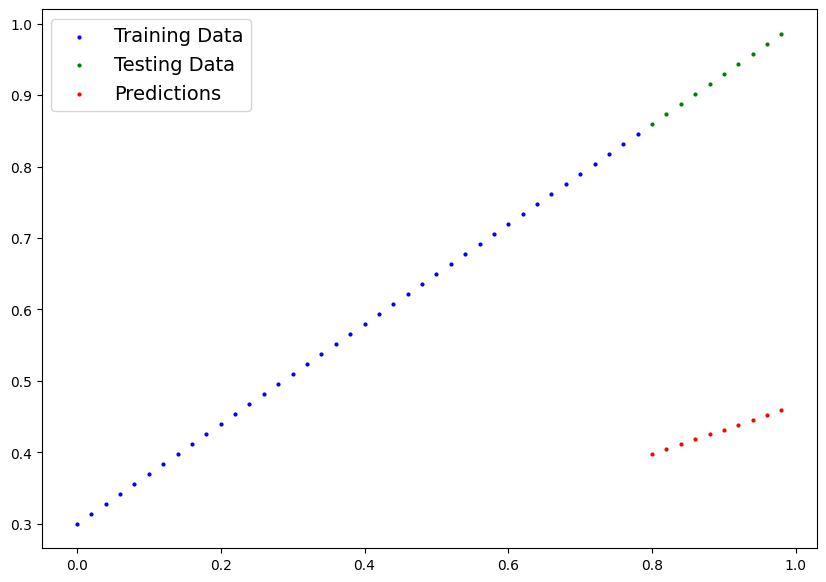

In [ ]:
plot_predictions(predictions=y_pred)

## 3. Model Training

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to soome known parameter.

Or in other words from poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to used loss functions

*Note: loss functions may also be called cost function or criterion.

Things we need to train:

* Loss Function: A function to meausre how wrong your model's prediction are to the ideal outputs, lower is better.

* Optimizer: Takes into account the loss of a model and adjusts the model's parameters to improve the loss function.
  * Inside the optimizer you'll often have to set two parameters:
  
    *params- the model parameters you'd like to optimize

    *lr(learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small lr results in small changes, a large lr results in large changes)


And specifically for pytorch we need:
* A training loop
* A testing loop

In [ ]:
# Set up a loss function

loss_fn= nn.L1Loss()
loss_fn

# Set up an optimizer  stochastic means random number, it increase the weight until loss is 0 and same for bias.
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)  # lr means learning rate = possibly the most important hyper parameter you can set
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

which loss funciton and optimizer should i use?


### Building a training loop and testing loop in pytorch

A couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's  `forward()` functions) to make predictions on data- also called forward propagation
3. Calculate the loss (compare forward pass predictions o ground truth tables)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the paramters of our model with respect to the loss (**backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameter to try and improve the loss (**gradient descent**)


what is a gradient ? change in y and change in x -

In [ ]:
# an epoch is loop(this is a hyperparameter because we've set it ourselves)
epochs= 200

# Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
# 1 loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() #train mode in pytorch sets all parameters that require gradients to require gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  # 2.calculate the loss
  loss=loss_fn(y_pred,y_train)  # calulating the differnece betwenn pred and the original
  print(f"Loss: {loss}")
  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagaion on the loss with respect to the parameters fo the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by deafult how the optimizer change will accumulate through the loop so..we have to zero them above in step 3 for the next iteration of the loop
  # print(f"epoch: {epoch} loss: {loss}")
# testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing(dropout , batch norm layers)


  with torch.inference_mode():  #turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass in testing
    test_pred =model_0(X_test)

    # 2. Calculate the loss
    test_loss= loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch :{epoch}  | loss: {loss} | test loss: {test_loss}")



Loss: 0.31288138031959534
Epoch :0  | loss: 0.31288138031959534 | test loss: 0.48106518387794495
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch :10  | loss: 0.1976713240146637 | test loss: 0.3463551998138428
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch :20  | loss: 0.08908725529909134 | test loss: 0.21729660034179688
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.05314852

Which loss function and optimizer should i use


This will be problem specific. But with experience, you'll get an idea f what works and what does not with your problem set.

For eg, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for classification problem like classification problem like classifying whether a photo of a dog or a cat, you'll like to use a loss function nn.BCELoss() (binary cross entropy loss).

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

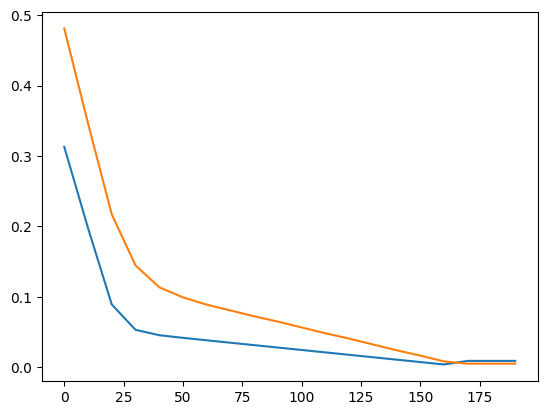

In [ ]:
# plot the loss curve
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

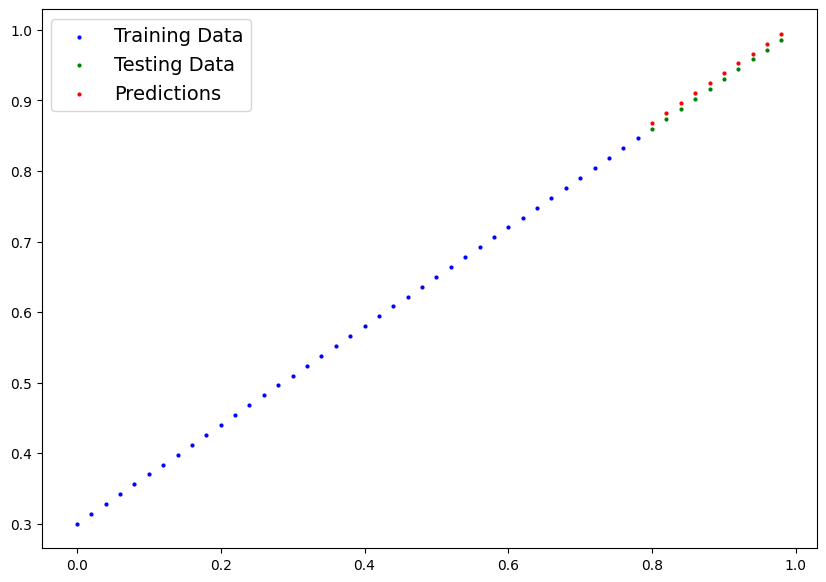

In [ ]:
plot_predictions(predictions=y_preds_new)

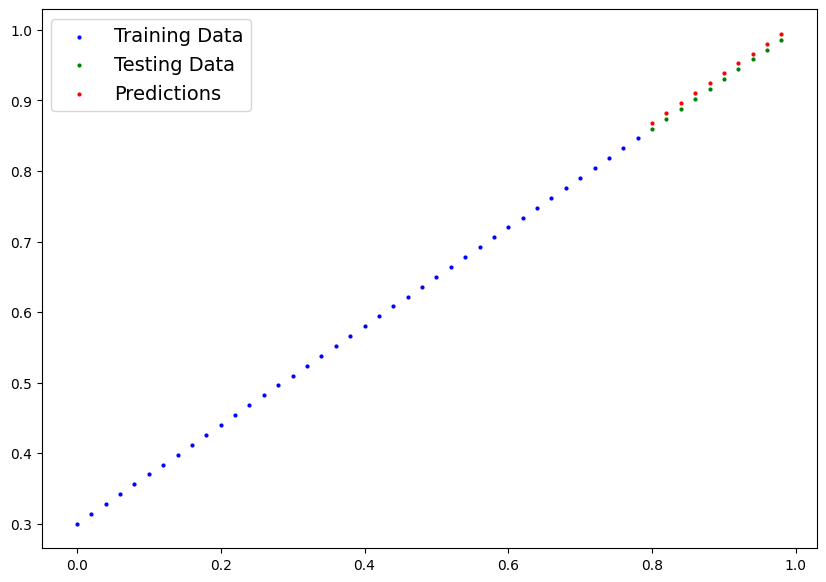

In [ ]:
plot_predictions(predictions=y_preds_new)

### Saving a model in Pytorch
There are three main methods you should knwo about for savinf and loading model in Pytorch.

1. 'torch.save()'= allows you save a pytorch object in python's pickle format (python object serialization)

2. 'torch.load()' = allows tyou to saved a pytorch object
3.torch.nn.module.load_state_dict()-  this allows to load a mdoel's saved state dictionary

In [ ]:
# saving our pytorch model
from pathlib import Path

# 1.create model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2.Create model save path
MODEL_NAME="O1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3.SAVE THE MODEL STATE_DICT
print("saving the model your first pytorch model neha")
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

saving the model your first pytorch model neha


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 18 12:00 O1_pytorch_workflow_model_0.pth


##Loading a pytorch model
Since we saved pur models state_dict() rather the entire ,odel we will create a new instance fo our model class and load the saved state_dicyt inot that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiare a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# Load the saved state_duct of model_0 this will update thje new isntance with updated parameters
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Puttting it all together
Let's go through the steps above and see it all in one place.